In [1]:
import torch
import torchvision
from torch.autograd import Variable
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from models import Cifar10_Net
from cifar10_dataloader import CIFAR10



In [4]:
#define network for cifar10
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,3, padding=1, stride=1, dilation=1)
        self.conv2 = nn.Conv2d(6,16,3, padding=1, stride=1, dilation=1)
        self.conv3 = nn.Conv2d(16,32,3, padding=1, stride=1, dilation=1)
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 32 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Files already downloaded and verified
Files already downloaded and verified


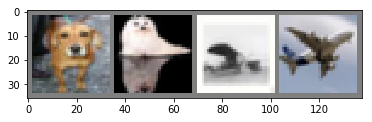

  dog   dog plane plane


In [3]:
# load cifar10 data
c10 = CIFAR10()
c10.imshow()

In [4]:
# init CNN, loss and optimizer
net = Net().cuda()
# net.cuda()

lr = 0.001
momentum = 0.9
optimizer = optim.SGD(net.parameters(), lr, momentum)
criterion = nn.CrossEntropyLoss()

In [5]:
runing_loss = 0.0
for epoch in range(20):
    for i, data in enumerate(c10.trainLoader()):
        input, label = data
#         input, label = Variable(input), Variable(label)
        input, label = Variable(input.cuda()), Variable(label.cuda())

        optimizer.zero_grad()
        
        out = net(input)
         
        loss = criterion(out, label)
        loss.backward()
        
        optimizer.step()
        
        runing_loss += loss.data[0]
        
        if i % 2000 == 1999:
            print(out)
            print(label)
            print('[%d, %5d] loss: %.3f' % 
                  (epoch + 1, i + 1, runing_loss/2000))
            runing_loss = 0.0
        

Variable containing:
 0.0433  0.0343  0.0210  0.1029  0.0245 -0.0569  0.0387 -0.0200 -0.0378 -0.0480
 0.0541  0.0609  0.0112  0.0955 -0.0026 -0.0725  0.0285 -0.0161 -0.0319 -0.0276
 0.0444  0.0256  0.0275  0.1111  0.0289 -0.0511  0.0378 -0.0153 -0.0475 -0.0539
 0.0479  0.0336  0.0216  0.1094  0.0191 -0.0504  0.0391 -0.0182 -0.0426 -0.0447
[torch.cuda.FloatTensor of size 4x10 (GPU 0)]

Variable containing:
 6
 9
 5
 2
[torch.cuda.LongTensor of size 4 (GPU 0)]

[1,  2000] loss: 2.302
Variable containing:
 0.4490  1.0254 -0.3636 -0.7342 -0.8849 -0.7588 -1.2320  0.2295  1.1414  1.4397
-1.8219  0.0642  1.1016  0.5100  1.3579  0.7861  1.2227  0.8036 -2.2962 -0.5651
-0.2183  0.4959  0.2786  0.1249 -0.1910  0.4870 -0.3777  0.2071 -0.2287  0.1250
-2.4063 -0.1417  1.6329  0.9586  2.0370  1.3858  1.7533  0.8122 -3.1812 -1.2774
[torch.cuda.FloatTensor of size 4x10 (GPU 0)]

Variable containing:
 1
 7
 1
 6
[torch.cuda.LongTensor of size 4 (GPU 0)]

[1,  4000] loss: 2.176
Variable containing:
-0.86

Process Process-4:
Process Process-3:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/dyj/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/dyj/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/dyj/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dyj/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dyj/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 35, in _worker_loop
    r = index_queue.get()
  File "/home/dyj/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 35, in _worker_loop
    r = index_queue.get()
  File "/home/dyj/anaconda3/lib/python3.6/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/home/dyj

KeyboardInterrupt: 

In [ ]:
#test network
total = 0
correct = 0

# print(len(c10.testLoader())
print('start calculate the result......')
for i, data in enumerate(c10.testLoader()):
    input, label = data
    out = net(Variable(input))
    _, prediction = torch.max(out.data, 1)
    
#     print(prediction)
#     print('Num %d test: ' % i)
#     print('Testing result is: ', ' '.join('%5s' % c10.classes[prediction[j][0]] for j in range(4)))
#     print('GroundTruth is :', ' '.join('%5s' % c10.classes[label[j]] for j in range(4)))
    
    total += label.size(0)
    correct += (prediction == label).sum()
    
    if i == 2499:
        print(total, correct)
        print('Accuracy for %5d images is %2f' % (total, 100 * correct / total))
        print('Finish calculate result')
        break;

start calculate the result......


In [52]:
#do test on each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for i, data in enumerate(c10.testLoader()):
    input, labels = data
    out = net(Variable(input))
    _, prediction = torch.max(out.data, 1)
    
    c = (prediction == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        c10.classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 78 %
Accuracy of   car : 73 %
Accuracy of  bird : 52 %
Accuracy of   cat : 32 %
Accuracy of  deer : 63 %
Accuracy of   dog : 42 %
Accuracy of  frog : 82 %
Accuracy of horse : 71 %
Accuracy of  ship : 83 %
Accuracy of truck : 72 %
